In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format

import json # library to handle JSON files

#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from bs4 import BeautifulSoup # Library for webscrabing
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings  
warnings.filterwarnings("ignore")  # library to ignore warnings
#!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
df = pd.read_csv('..\datasets\df_final.csv')

In [3]:
df.loc[38,'Annual_Income'] = 43730

### Clustering Districts based on Venues 

In [4]:
new_dataset = df.copy()
new_dataset.head()

,District,Population,Area,Density,Mensual_Household_Income,Annual_Income,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Burger King,Mc Donalds,KFC,Total_Venues,Total_Competitors
0,Adalar,16372,11,1482,6652,79821,40.87,29.13,10,4,4,48,17,50,52,10,20,97,0,0,0,312,0
1,Arnavutköy,312023,450,693,2030,24360,41.18,28.74,16,25,9,81,10,48,102,22,96,11,5,0,0,420,5
2,Ataşehir,427217,25,16933,6577,78924,40.98,29.11,30,91,7,190,36,106,165,69,102,56,8,3,6,852,17
3,Avcılar,457981,42,10902,3662,43938,40.98,28.72,43,56,11,210,77,100,109,40,90,70,4,2,2,806,8
4,Bağcılar,744351,22,33289,3197,38367,41.03,28.86,49,82,17,129,33,115,103,30,91,27,6,2,2,676,10


- Dropping columns that is not used for clustering.

In [5]:
#dropped_columns = ["District","Mensual_Household_Income","Latitude","Longitude","Event","Total_Venues","Area",'Total_Competitors']
columns = ['Annual_Income','Population',"Total_Venues",'Total_Competitors']

In [6]:
cluster_dataset = new_dataset[columns]
cluster_dataset.tail()

,Annual_Income,Population,Total_Venues,Total_Competitors
34,93864,284294,931,24
35,40884,284443,63,7
36,43641,726758,752,20
37,83839,525395,641,18
38,43730,293839,725,4


In [7]:
scaler = StandardScaler()
scaled_venues=scaler.fit_transform(cluster_dataset)

#### Clustering Our Data using KMeans  

In [8]:
kmeans = KMeans()

#### Choosing the best K by using Elbow Method

In [9]:
# n_clusters=10
# cost=[]
#or i in range(1,n_clusters):
 #   kmeans= KMeans(i)
  #  kmeans.fit(scaled_venues)
   # cost.append(kmeans.inertia_)
#plt.figure (figsize = (10,8))
#plt.plot(cost,marker = "o",markerfacecolor='red')
#plt.xlabel("Number of K",fontsize =16)
#plt.ylabel("WCSS",fontsize =16)
#plt.title("Number of K vs WCSS",fontsize=18)

In [10]:
#plt.figure (figsize = (10,8))
#plt.plot(marker = "o",markerfacecolor='red')
#plt.xlabel("Number of K",fontsize =16)
#plt.ylabel("WCSS",fontsize =16)
#plt.title("Number of K vs WCSS",fontsize=18)
#plt.show()

In [11]:
kmeans = KMeans(n_clusters=3,random_state=42)

In [12]:
kmeans.fit(scaled_venues)

KMeans(n_clusters=3, random_state=42)

In [13]:
kmeans.labels_

array([1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1])

In [14]:
cluster_dataset["Segment"]= kmeans.labels_   ### getting labels
cluster_dataset = pd.concat([new_dataset['District'],cluster_dataset],axis=1)
cluster_dataset['Segment'] =  cluster_dataset.Segment.map({0:1,1:2,2:3}).astype('int')

### Analyzing Clusters

In [15]:
cluster_dataset.groupby('Segment').mean()

,Annual_Income,Population,Total_Venues,Total_Competitors
Segment,,,,
1,"87,539.50","362,168.20",824.30,18.50
2,"41,731.29","342,616.46",447.21,5.54
3,"39,552.80","799,284.60",661.00,14.80


In [16]:
cluster_dataset.Segment = cluster_dataset.Segment.map({1:'Well-done',2:'Rare',3:'Medium'})

In [17]:
cluster_dataset.head()

,District,Annual_Income,Population,Total_Venues,Total_Competitors,Segment
0,Adalar,79821,16372,312,0,Rare
1,Arnavutköy,24360,312023,420,5,Rare
2,Ataşehir,78924,427217,852,17,Well-done
3,Avcılar,43938,457981,806,8,Rare
4,Bağcılar,38367,744351,676,10,Medium


### First Group of Districts

In [37]:
cluster_dataset[cluster_dataset['Segment']=='Well-done']


,District,Annual_Income,Population,Total_Venues,Total_Competitors,Segment
2,Ataşehir,78924,427217,852,17,Well-done
6,Bakırköy,106140,228759,892,28,Well-done
9,Beşiktaş,126720,178938,752,16,Well-done
12,Beyoğlu,57275,233322,1230,7,Well-done
19,Fatih,63378,382990,833,14,Well-done
22,Kadıköy,108300,485233,1008,32,Well-done
26,Maltepe,69259,525566,745,16,Well-done
29,Sarıyer,87696,349968,359,13,Well-done
34,Şişli,93864,284294,931,24,Well-done
37,Üsküdar,83839,525395,641,18,Well-done


### Second Group of Districts

In [38]:
cluster_dataset[cluster_dataset['Segment']=='Medium']

,District,Annual_Income,Population,Total_Venues,Total_Competitors,Segment
4,Bağcılar,38367,744351,676,10,Medium
17,Esenyurt,36288,977489,631,13,Medium
25,Küçükçekmece,42804,805930,555,10,Medium
27,Pendik,36664,741895,691,21,Medium
36,Ümraniye,43641,726758,752,20,Medium


### Third Group of Districts

In [39]:
cluster_dataset[cluster_dataset['Segment']=='Rare']

,District,Annual_Income,Population,Total_Venues,Total_Competitors,Segment
0,Adalar,79821,16372,312,0,Rare
1,Arnavutköy,24360,312023,420,5,Rare
3,Avcılar,43938,457981,806,8,Rare
5,Bahçelievler,56088,605300,1,13,Rare
7,Başakşehir,54152,503243,381,10,Rare
8,Bayrampaşa,41762,274884,788,6,Rare
10,Beykoz,44316,248595,228,5,Rare
11,Beylikdüzü,51924,398122,614,10,Rare
13,Büyükçekmece,44049,269160,484,6,Rare
14,Çatalca,25536,76131,429,0,Rare


## Results


- **Medium** : District in this group has higher population compared to cluster 0. There are many food venue. Annual income of this group is average of entire boroughs.It is a middle segment group of our analysis.

- **Rare** : This group has the lowest venue and people who live in these boroughs has average annual.Their population is also lower than others in general.

- **Well-done** : This group has higher number of venues and annual income. There are many Transportation ,Food Venues,Nightlife Spot in this group.If our menu is expensive. We can choose to start with this group.

### Visualization Our Group of Districts

- We will use principal component analysis to visualize our groups

In [209]:
pca = PCA(n_components=2)

In [210]:
pca_df = pca.fit_transform(scaled_venues)

In [211]:
columns = ['pca1','pca2']

In [212]:
pca_df = pd.DataFrame(pca_df,columns=columns)

In [213]:
pca_df['Cluster'] = kmeans.labels_

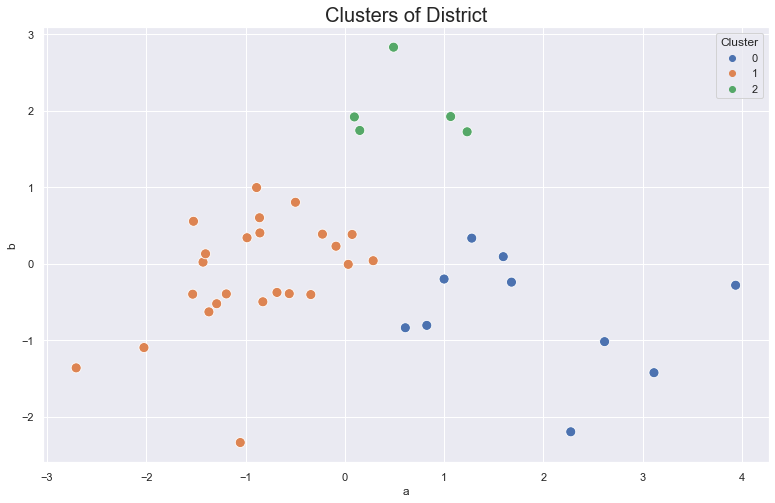

In [214]:
plt.figure(figsize=(13,8))
sns.scatterplot(x='pca1',y='pca2',hue='Cluster',s=100,data=pca_df,palette='deep',legend='full')
plt.title("Clusters of District",fontsize=20)
plt.xlabel('a',fontsize=12)
plt.ylabel('b',fontsize=12)
plt.show()

### Discussion

 In this project , We used K-Means algorithm to cluster our dataset.K-Means clustering algorithm is moslty used algorithm amongst Unsupervised Learning.After we explore our dataset with venues information. With this study , We can get important information based on Boroughs.To get business decision to open a restaurant , We could also expand our dataset with venues name,population details etc. to target more specifically.This project also can be used for people who have never been to Istanbul but want to know basic information about venues, type of boroughs


## Conclusion


In this study, I analyzed districts of Istanbul and clustered boroughs based on their similarity. This algorithm can help us understand each group of boroughs and their similarity.With this study,we can understand pattern of each group and get insight about each district.In terms of people who consider open a restaurant in Istanbul , this study helps them understand district and their similarity. For example If we want to open a restaurant in Kadıköy, we can also compare Kadıköy to other districts in the same cluster.
